## Prerequisites

1. Install tensorflow (CPU version OK) and keras on your laptop
2. Download the zip file (of images) onto your laptop, and unzip it. 

## Section 1. Artificial Neural Networks

### Read the Data and Profile It

In [2]:
import pandas as pd
import pandas_profiling
datafile = "Lesson_9_Data/infert.csv"
data = pd.read_csv(datafile, sep=",")
pandas_profiling.ProfileReport(data)

Number of variables,8
Number of observations,248
Total Missing (%),0.0%
Total size in memory,15.6 KiB
Average record size in memory,64.3 B
Numeric,6
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### Split Data into Training and Validation

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)
print(train.shape, test.shape)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(198, 8) (50, 8)


### One-hot Encoding the Categorical Variable (Education)

In [4]:
x_variables = ['education', 'age', 'parity', 'induced', 'spontaneous', 'stratum', 'pooled.stratum']
y_variable = ['case']
x_train = train[x_variables]
x_test = test[x_variables]
y_train = train[y_variable]
y_test = test[y_variable]

import category_encoders as ce

le =  ce.OneHotEncoder(return_df=False, impute_missing=False, handle_unknown="ignore")
x_train_encoded = le.fit_transform(x_train)
print(x_train_encoded[0:5, :])

x_test_encoded = le.transform(x_test)
print(x_test_encoded[0:5, :])

[[ 1  0  0 35  2  1  0 61 54]
 [ 0  1  0 28  2  0  2 23 19]
 [ 1  0  0 28  1  1  0 54 42]
 [ 0  1  0 34  2  0  0 32 23]
 [ 0  1  0 41  1  0  0 43 15]]
[[ 0  1  0 29  2  1  0 11 20]
 [ 1  0  0 27  3  2  0 53 57]
 [ 1  0  0 26  2  2  0 49 49]
 [ 0  1  0 30  4  2  0 30 35]
 [ 1  0  0 21  1  0  0 67 39]]


### Get Rid of the First Column to Remove Dependency Among the First 3 Columns (Education one-hot Encoding)

In [5]:
x_train_encoded = x_train_encoded[:, 1:x_train_encoded.shape[1]]
x_test_encoded = x_test_encoded[:, 1:x_test_encoded.shape[1]]
print(x_train_encoded[0:5, :])

[[ 0  0 35  2  1  0 61 54]
 [ 1  0 28  2  0  2 23 19]
 [ 0  0 28  1  1  0 54 42]
 [ 1  0 34  2  0  0 32 23]
 [ 1  0 41  1  0  0 43 15]]


### Normalize X Variables

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train_encoded)
print(scaler.mean_)
print(scaler.scale_)
x_train_scaled = scaler.transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)

[ 0.49494949  0.05050505 31.38888889  2.08585859  0.56565657  0.58080808
 41.01515152 32.89393939]
[ 0.49997449  0.21898468  5.20928442  1.27433961  0.72001145  0.72546422
 24.11870419 17.40613684]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Define and Train Artificial Neural Networks

In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver="sgd", alpha = 1e-5, learning_rate_init=0.05, \
                    max_iter=300, hidden_layer_sizes=(7,), random_state=1, \
                   verbose=True) #change hidden layer sizes from 7 to 20 to see whether overfitting happens
clf.fit(x_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.97405612
Iteration 2, loss = 0.94023680
Iteration 3, loss = 0.89681230
Iteration 4, loss = 0.84946877
Iteration 5, loss = 0.80279816
Iteration 6, loss = 0.76005565
Iteration 7, loss = 0.72348316
Iteration 8, loss = 0.69437982
Iteration 9, loss = 0.67250788
Iteration 10, loss = 0.65710838
Iteration 11, loss = 0.64682120
Iteration 12, loss = 0.64032299
Iteration 13, loss = 0.63603433
Iteration 14, loss = 0.63287500
Iteration 15, loss = 0.63000192
Iteration 16, loss = 0.62686086
Iteration 17, loss = 0.62298606
Iteration 18, loss = 0.61838001
Iteration 19, loss = 0.61307923
Iteration 20, loss = 0.60706127
Iteration 21, loss = 0.60048964
Iteration 22, loss = 0.59368581
Iteration 23, loss = 0.58677091
Iteration 24, loss = 0.58004170
Iteration 25, loss = 0.57356907
Iteration 26, loss = 0.56747355
Iteration 27, loss = 0.56188683
Iteration 28, loss = 0.55689410
Iteration 29, loss = 0.55245366
Iteration 30, loss = 0.54856560
Iteration 31, loss = 0.54521877
Iteration 32, los

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7,), learning_rate='constant',
       learning_rate_init=0.05, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

### Predict the Testing Data and Evaluate Accuracy

In [8]:
y_test_hat = clf.predict(x_test_scaled)
y_test_prob = clf.predict_proba(x_test_scaled)
print(y_test_hat)
print(y_test_prob) #Column 1 is the probability that y=0, and column 2 is the probability that y=1

[0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 1 0 0 0]
[[0.87293861 0.12706139]
 [0.82358695 0.17641305]
 [0.83563418 0.16436582]
 [0.76590851 0.23409149]
 [0.85635293 0.14364707]
 [0.07560982 0.92439018]
 [0.0783276  0.9216724 ]
 [0.9643725  0.0356275 ]
 [0.27494057 0.72505943]
 [0.14398101 0.85601899]
 [0.89122539 0.10877461]
 [0.68583459 0.31416541]
 [0.28245173 0.71754827]
 [0.34171873 0.65828127]
 [0.84011781 0.15988219]
 [0.90234994 0.09765006]
 [0.51624021 0.48375979]
 [0.03389837 0.96610163]
 [0.56339367 0.43660633]
 [0.54599424 0.45400576]
 [0.93683995 0.06316005]
 [0.58681349 0.41318651]
 [0.84900269 0.15099731]
 [0.45800545 0.54199455]
 [0.66977406 0.33022594]
 [0.88564883 0.11435117]
 [0.87361575 0.12638425]
 [0.92959711 0.07040289]
 [0.76038051 0.23961949]
 [0.85507473 0.14492527]
 [0.82403567 0.17596433]
 [0.89554041 0.10445959]
 [0.83275078 0.16724922]
 [0.88310328 0.11689672]
 [0.93118078 0.06881922]
 [0.82953184 0.1704681

In [9]:
accuracy = [1 if y_test_hat[i]==y_test.iloc[i,0] else 0 for i in range(len(y_test_hat))]
print("Accuracy=%.2f"%round(sum(accuracy)/float(len(y_test_hat))*100,2))

Accuracy=72.00


## Section 2. Deep Learning (But Still Shallow)

### Build the Same Model in Keras (A Deep Learning Framework by Facebook)

In [ ]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(1)
# load pima indians dataset

model = Sequential()
model.add(Dense(7, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Fit the model
model.fit(x_train_scaled, y_train, epochs=300, batch_size=10)
# evaluate the model
scores = model.evaluate(x_test_scaled, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

### Visualizing the Deep Learning Model

In [ ]:
%matplotlib inline
from ann_visualizer.visualize import ann_viz

ann_viz(model, title="My First Artificial Neural Network from Keras")

## Section 3. Use Pre-trained Deep Learning Models for Feature Extraction 

### Use Pretrained Deep Learning CNN Model as Feature Extractor

In [15]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from os import listdir
from os.path import isfile, join

model = VGG16(weights='imagenet', include_top=False)
model.summary()

IMAGE_DIR = 'Lesson_9_Data/Image_Featurization'
SUB_DIRS = ['Santa', 'Not_Santa']
file_names = []
feature_vectors = np.array([[]])
image_count = 0
for sub_dir in SUB_DIRS:
    onlyfiles = [f for f in listdir(join(IMAGE_DIR, sub_dir)) if isfile(join(IMAGE_DIR, sub_dir, f))]
    print("There are %d files in %s"%(len(onlyfiles), sub_dir))
    for file in onlyfiles:
        try:
            img_path = join(IMAGE_DIR, sub_dir, file)
            img = image.load_img(img_path, target_size=(224, 224))
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)
            vgg16_feature = model.predict(img_data)
            vgg16_feature_vector = vgg16_feature.flatten()
            if image_count == 0:
                feature_vectors = np.empty((0, vgg16_feature_vector.shape[0]), float)
            feature_vectors = np.append(feature_vectors, np.array([vgg16_feature_vector]), axis=0)
            file_names.append(sub_dir + "_" + file)
            image_count += 1
        except:
            print("Cannot featurize file %s"%img_path)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Get the Shape of the Feature Vectors

In [16]:
feature_vectors.shape

(62, 25088)

### Hierarchical Clustering on Feature Vectors

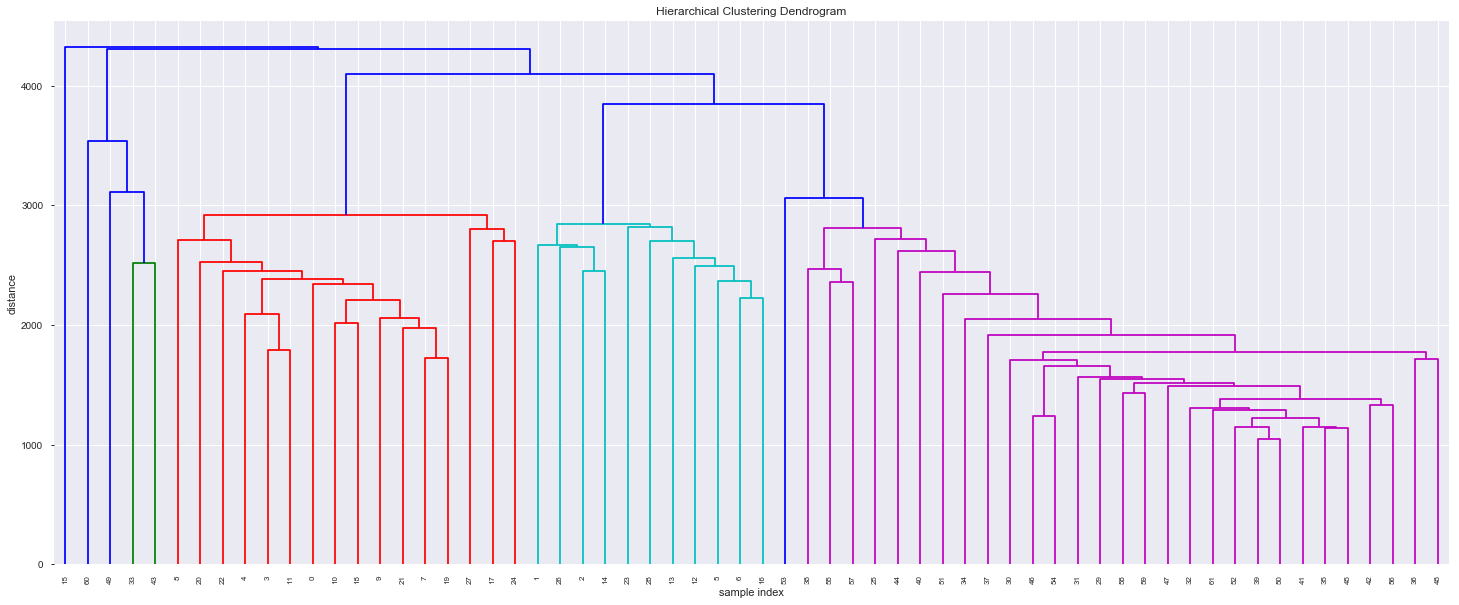

In [18]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

%matplotlib inline

Z = linkage(feature_vectors, 'ward') #ward: Ward variance minimization algorithm, 
                                     #other candidates include "single", "complete", "average"...
                                     #different distance metrics like 'euclidean' (default), 'cityblock', 'cosine'...
c, coph_dists = cophenet(Z, pdist(feature_vectors))

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

### Check the Clustering Results

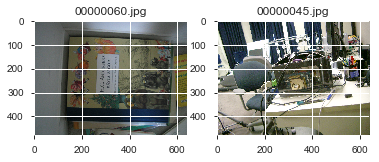

In [19]:
check_pair = [42, 44] #[10, 14], [5, 28], [38, 45], [42, 44], [59, 61, 60], [41, 57, 58]
f = plt.figure()
img_index = 0
import matplotlib.image as mpimg
for index in check_pair:
    filename = file_names[index]
    filename = filename.split("_")
    if len(filename) == 3:
        file = filename[2]
        sub_dir = filename[0] + "_" + filename[1]
    else:
        file = filename[1]
        sub_dir = filename[0]
    img_path = join(IMAGE_DIR, sub_dir, file)
    ax = f.add_subplot(1, len(check_pair), img_index+1)
    image = mpimg.imread(img_path)
    plt.imshow(image)
    ax.set_title(file)
    img_index += 1
plt.show()